In [36]:
import os
import pandas as pd
import geopandas as gpd
import fiona
import glob
import glob2
import shutil
import numpy as np
import matplotlib.pyplot as plt

In [6]:
USGS_gdf = gpd.read_file(os.path.join("..", "output", "USGS_all.shp"))
ESRI_gdf = gpd.read_file(os.path.join("..", "output", "ESRI_all.shp"))

In [3]:
def percent_difference(current, previous):
    absval = abs(current - previous)
    avg = (current + previous) / 2
    try: 
        return (absval / avg) * 100.0
    except ZeroDivisionError:
        return 0

In [4]:
sites = USGS_gdf['Site_ID'].unique()
sites

array(['08098450', '08140860', '08180990', '08128030', '08167200',
       '08168770', '08061548', '08099382', '08178980', '08181725',
       '08183978'], dtype=object)

In [41]:
usgs_area = []
esri_area = []

for site in sites:
    earea = ESRI_gdf['Area_sq_mi'].loc[ESRI_gdf['Site_ID'] == site].mean()
    uarea = USGS_gdf['Area_sq_mi'].loc[USGS_gdf['Site_ID'] == site].mean()
    
    esri_area.append(earea)
    usgs_area.append(uarea)

df = pd.DataFrame({'Site_ID':sites,'USGS_Area':usgs_area,'ESRI_Area':esri_area})

    
df['PercentDiff'] = df.apply(lambda i : percent_difference(i["USGS_Area"], i["ESRI_Area"]), axis=1)
df.to_csv(os.path.join("..", "output", "Area_Diff.csv"))
df

,Site_ID,USGS_Area,ESRI_Area,PercentDiff
0,08098450,17114.882815,27024.590155,44.901793
1,08140860,450.059818,448.976293,0.241042
2,08180990,38.478247,39.123764,1.663661
3,08128030,446.105898,437.078919,2.044188
4,08167200,1102.669224,1102.872162,0.018403
5,08168770,29.706653,30.261544,1.850619
6,08061548,0.308413,0.046564,147.530452
7,08099382,143.663448,143.668147,0.003270
8,08178980,472.185548,472.217490,0.006764
9,08181725,1719.834309,1720.061931,0.013234


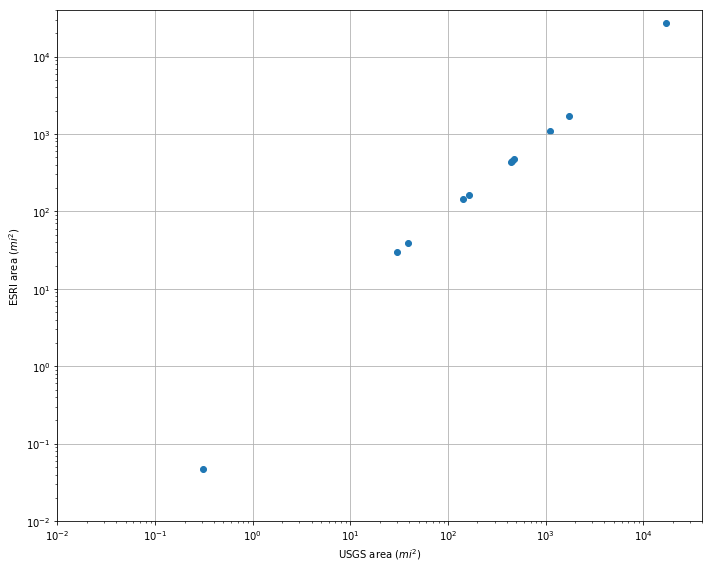

In [48]:
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(df['USGS_Area'],df['ESRI_Area'])
# ax.plot(x, y)
ax.grid()

ax.set_xlim(0.01, 40000)
ax.set_ylim(0.01, 40000)

ax.set_ylabel('ESRI area $(mi^2)$')
ax.set_xlabel('USGS area $(mi^2)$')
ax.set_yscale('log')
ax.set_xscale('log')
plt.savefig(os.path.join("..", "output", "logPlot.png"))

fig.tight_layout()


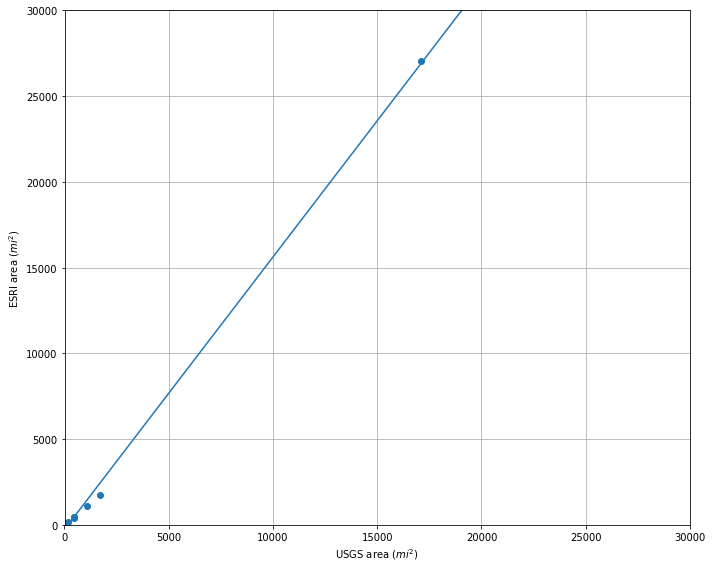

In [49]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(df['USGS_Area'],df['ESRI_Area'])
x = np.arange(1, 20000, 100)
y = slope * x + intercept

fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(df['USGS_Area'],df['ESRI_Area'])
ax.plot(x, y)
ax.grid()

ax.set_xlim(0.01, 30000)
ax.set_ylim(0.01, 30000)

ax.set_ylabel('ESRI area $(mi^2)$')
ax.set_xlabel('USGS area $(mi^2)$')
plt.savefig(os.path.join("..", "output", "arithmeticPlot.png"))

fig.tight_layout()